# ML HW1 | Supervised Learning | Neural Net
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Note: I partially took this course in Fall of 2020 and dropped the course. Some content may trigget plagiarism tests.

## Import Libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import time

## Set directory

In [113]:
directory = "/Users/michaelpecorino/Documents/GitLab/ncaa/"

## Load inputs

In [114]:
ncaa_all = pd.read_csv(directory + "ncaa_all.csv")
train = pd.read_csv(directory + "ncaa_train.csv")
valid = pd.read_csv(directory + "ncaa_valid.csv")
test = pd.read_csv(directory + "ncaa_test.csv")

## Define features and response variable

### Features

In [115]:
features = ["game_win_perc_prop", 
            "game_starters_total_minutes_prop", "game_starters_prop_minutes_prop", "game_player_pts_10plus_prop",
            "game_player_pts_15plus_prop", "game_player_pts_16plus_prop", "game_player_pts_17plus_prop",
            "game_player_pts_18plus_prop", "game_player_pts_19plus_prop", "game_player_pts_20plus_prop",
            "game_player_pts_21plus_prop", "game_player_pts_22plus_prop", "game_player_ast_3plus_prop",
            "game_player_ast_5plus_prop", "game_player_ast_7plus_prop",
            "game_player_orb_1plus_prop", "game_player_orb_2plus_prop", "game_player_orb_3plus_prop",
            "game_player_drb_5plus_prop", "game_player_drb_7plus_prop", "game_player_drb_10plus_prop",
            "game_gs_mean_prop", "game_gs_max_prop", "game_pos_prop", "game_pts_prop", "game_efficiency_prop",
            "game_fg_attempted_prop", "game_ft_attempted_prop", "game_ft_made_prop", "game_stl_prop",
            "game_tov_prop","game_stl_tov_ratio_diff", "game_stl_tov_ratio_prop", "game_blk_prop",
            "game_orb_prop", "game_drb_prop", "game_trb_prop", "game_ast_prop", "game_pf_diff", "game_pf_prop",
            "home_indicator.x", "neutral_indicator"]
ncaa_all_features = ncaa_all[features]
train_features = train[features]
valid_features = valid[features]
train_valid_features = train_features.append(valid_features)
test_features = test[features]

### Response variable

In [116]:
response_variable = "win_indicator"
ncaa_all_response = ncaa_all[response_variable]
train_response = train[response_variable]
valid_response = valid[response_variable]
train_valid_resposnse = train_response.append(valid_response)
test_response = test[response_variable]

## Neural Network

### Grid search

In [117]:
folds = set(train['fold'])
folds

{1, 2, 3, 4, 5}

In [14]:
neural_network_results = pd.DataFrame(columns = ['hidden_layer_size', 'solver', 'activation', 'alpha',
                                                 'fold', 'in_fold_accuracy', 'out_fold_accuracy'
                                                 ])

hidden_layer_sizes = [250, 500, 750, 1000, 1250, 1500]
alphas = [.01, .02, .05, .1]

for alpha in alphas:
    for hidden_layer_size in hidden_layer_sizes:
        for solver in ["adam"]:
            for activation in ["relu"]:
                for fold in folds:
        
                    #Debugging
                    #alpha = .01
                    #hidden_layer_size = 250
                    #solver = "adam"
                    #activation = "relu"
                    #fold = 1

                    train_features_in_fold = train[train["fold"] != fold][features]
                    train_response_in_fold = train[train["fold"] != fold][response_variable]

                    test_features_out_fold = train[train["fold"] == fold][features]
                    test_response_out_fold = train[train["fold"] == fold][response_variable]

                    print("Modeling fold", fold, "with:",
                          hidden_layer_size, "hidden layers, ",
                          alpha, "regularization, ",
                          solver, "solver, and ",
                          activation, "activation")

                    neural_network = MLPClassifier(solver = solver, #lbfgs, adam, sgd
                                                   activation = activation, #identity, logistic, tanh, relu
                                                   alpha = alpha,
                                                   hidden_layer_sizes = (hidden_layer_size,),
                                                   batch_size = 'auto',
                                                   learning_rate = 'constant',
                                                   learning_rate_init = 0.001,
                                                   power_t = 0.5,
                                                   max_iter = 200,
                                                   shuffle = True,
                                                   random_state = 28,
                                                   tol = 0.0001,
                                                   verbose = False,
                                                   warm_start = False,
                                                   momentum = 0.9,
                                                   nesterovs_momentum = True,
                                                   early_stopping = True,
                                                   validation_fraction = 0.1,
                                                   beta_1 = 0.9,
                                                   beta_2 = 0.999,
                                                   epsilon = 1e-08,
                                                   n_iter_no_change = 10,
                                                   max_fun = 15000)

                    neural_network.fit(train_features_in_fold, train_response_in_fold) 

                    in_fold_accuracy = neural_network.score(train_features_in_fold, train_response_in_fold)
                    out_fold_accuracy = neural_network.score(test_features_out_fold, test_response_out_fold)

                    neural_network_results = neural_network_results.append({'hidden_layer_size': hidden_layer_size,
                                                                            'solver': solver,
                                                                            'activation': activation,
                                                                            'alpha': alpha,
                                                                            'fold': fold,
                                                                            'in_fold_accuracy': in_fold_accuracy,
                                                                            'out_fold_accuracy': out_fold_accuracy},
                                                                          ignore_index = True)
                    print(neural_network_results, "\n")

Modeling fold 1 with: 250 hidden layers,  0.01 regularization,  adam solver, and  relu activation
  hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0               250   adam       relu   0.01    1          0.705703   

   out_fold_accuracy  
0           0.706125   

Modeling fold 2 with: 250 hidden layers,  0.01 regularization,  adam solver, and  relu activation
  hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0               250   adam       relu   0.01    1          0.705703   
1               250   adam       relu   0.01    2          0.722529   

   out_fold_accuracy  
0           0.706125  
1           0.702351   

Modeling fold 3 with: 250 hidden layers,  0.01 regularization,  adam solver, and  relu activation
  hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0               250   adam       relu   0.01    1          0.705703   
1               250   adam       relu   0.01    2          0.722529   
2               2

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   

    out_fold_accuracy  
0            0.706125  
1            0.

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
5                500   adam       relu   0.01    1          0.708127   
6                500   adam       relu   0.01    2          0.714330   
7                500   adam       relu   0.01    3          0.716908   
8                500   adam       relu   0.01    4          0.705512   
9                500   adam       relu   0.01    5          0.708297   
10               750   adam       relu   0.01    1          0.718698   
11               750   adam       relu   0.01    2          0.708245   
12               750   adam       relu   0.01    3          0.71

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
..               ...    ...        ...    ...  ...               ...   
56              1500   adam       relu   0.02    2          0.705254   
57              1500   adam       relu   0.02    3          0.709483   
58              1500   adam       relu   0.02    4          0.712009   
59              1500   adam       relu   0.02    5          0.705615   
60               250   adam       relu   0.05    1          0.710035   

    out_fold_accuracy  
0            0.706125  
1            0.702351  
2            0.699464  
3            0.708333  
4            0.

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
..               ...    ...        ...    ...  ...               ...   
63               250   adam       relu   0.05    4          0.705409   
64               250   adam       relu   0.05    5          0.714536   
65               500   adam       relu   0.05    1          0.707869   
66               500   adam       relu   0.05    2          0.711494   
67               500   adam       relu   0.05    3          0.717269   

    out_fold_accuracy  
0            0.706125  
1            0.702351  
2            0.699464  
3            0.708333  
4            0.

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
..               ...    ...        ...    ...  ...               ...   
70               750   adam       relu   0.05    1          0.714109   
71               750   adam       relu   0.05    2          0.697623   
72               750   adam       relu   0.05    3          0.714846   
73               750   adam       relu   0.05    4          0.711339   
74               750   adam       relu   0.05    5          0.709844   

    out_fold_accuracy  
0            0.706125  
1            0.702351  
2            0.699464  
3            0.708333  
4            0.

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
..               ...    ...        ...    ...  ...               ...   
77              1000   adam       relu   0.05    3          0.699067   
78              1000   adam       relu   0.05    4          0.712938   
79              1000   adam       relu   0.05    5          0.709225   
80              1250   adam       relu   0.05    1          0.708230   
81              1250   adam       relu   0.05    2          0.704275   

    out_fold_accuracy  
0            0.706125  
1            0.702351  
2            0.699464  
3            0.708333  
4            0.

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
..               ...    ...        ...    ...  ...               ...   
84              1250   adam       relu   0.05    5          0.713453   
85              1500   adam       relu   0.05    1          0.707147   
86              1500   adam       relu   0.05    2          0.706183   
87              1500   adam       relu   0.05    3          0.711855   
88              1500   adam       relu   0.05    4          0.699840   

    out_fold_accuracy  
0            0.706125  
1            0.702351  
2            0.699464  
3            0.708333  
4            0.

   hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                250   adam       relu   0.01    1          0.705703   
1                250   adam       relu   0.01    2          0.722529   
2                250   adam       relu   0.01    3          0.710256   
3                250   adam       relu   0.01    4          0.716857   
4                250   adam       relu   0.01    5          0.718043   
..               ...    ...        ...    ...  ...               ...   
91               250   adam       relu   0.10    2          0.707111   
92               250   adam       relu   0.10    3          0.707678   
93               250   adam       relu   0.10    4          0.711906   
94               250   adam       relu   0.10    5          0.705719   
95               500   adam       relu   0.10    1          0.707405   

    out_fold_accuracy  
0            0.706125  
1            0.702351  
2            0.699464  
3            0.708333  
4            0.

    hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                 250   adam       relu   0.01    1          0.705703   
1                 250   adam       relu   0.01    2          0.722529   
2                 250   adam       relu   0.01    3          0.710256   
3                 250   adam       relu   0.01    4          0.716857   
4                 250   adam       relu   0.01    5          0.718043   
..                ...    ...        ...    ...  ...               ...   
98                500   adam       relu   0.10    4          0.709895   
99                500   adam       relu   0.10    5          0.708039   
100               750   adam       relu   0.10    1          0.714264   
101               750   adam       relu   0.10    2          0.704687   
102               750   adam       relu   0.10    3          0.710823   

     out_fold_accuracy  
0             0.706125  
1             0.702351  
2             0.699464  
3             0.708333 

    hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                 250   adam       relu   0.01    1          0.705703   
1                 250   adam       relu   0.01    2          0.722529   
2                 250   adam       relu   0.01    3          0.710256   
3                 250   adam       relu   0.01    4          0.716857   
4                 250   adam       relu   0.01    5          0.718043   
..                ...    ...        ...    ...  ...               ...   
105              1000   adam       relu   0.10    1          0.710087   
106              1000   adam       relu   0.10    2          0.704790   
107              1000   adam       relu   0.10    3          0.697210   
108              1000   adam       relu   0.10    4          0.719538   
109              1000   adam       relu   0.10    5          0.711752   

     out_fold_accuracy  
0             0.706125  
1             0.702351  
2             0.699464  
3             0.708333 

    hidden_layer_size solver activation  alpha fold  in_fold_accuracy  \
0                 250   adam       relu   0.01    1          0.705703   
1                 250   adam       relu   0.01    2          0.722529   
2                 250   adam       relu   0.01    3          0.710256   
3                 250   adam       relu   0.01    4          0.716857   
4                 250   adam       relu   0.01    5          0.718043   
..                ...    ...        ...    ...  ...               ...   
112              1250   adam       relu   0.10    3          0.712422   
113              1250   adam       relu   0.10    4          0.710308   
114              1250   adam       relu   0.10    5          0.714897   
115              1500   adam       relu   0.10    1          0.706167   
116              1500   adam       relu   0.10    2          0.708761   

     out_fold_accuracy  
0             0.706125  
1             0.702351  
2             0.699464  
3             0.708333 

### Output

In [16]:
neural_network_results = neural_network_results.sort_values(by = ['out_fold_accuracy'], ascending = False)
neural_network_results.to_csv(directory + "neural_net_grid_search.csv")
neural_network_results

,hidden_layer_size,solver,activation,alpha,fold,in_fold_accuracy,out_fold_accuracy
33,250,adam,relu,0.02,4,0.718713,0.710396
75,1000,adam,relu,0.05,1,0.715656,0.709425
20,1250,adam,relu,0.01,1,0.714934,0.708806
3,250,adam,relu,0.01,4,0.716857,0.708333
50,1250,adam,relu,0.02,1,0.713954,0.707981
...,...,...,...,...,...,...,...
88,1500,adam,relu,0.05,4,0.699840,0.693276
47,1000,adam,relu,0.02,3,0.702006,0.691213
16,1000,adam,relu,0.01,2,0.692466,0.689975
107,1000,adam,relu,0.10,3,0.697210,0.688531


### Get mean accuracy across the folds

In [118]:
neural_network_results = pd.read_csv(directory + "neural_net_grid_search.csv")
neural_network_results


,Unnamed: 0,hidden_layer_size,solver,activation,alpha,fold,in_fold_accuracy,out_fold_accuracy
0,33,250,adam,relu,0.02,4,0.718713,0.710396
1,75,1000,adam,relu,0.05,1,0.715656,0.709425
2,20,1250,adam,relu,0.01,1,0.714934,0.708806
3,3,250,adam,relu,0.01,4,0.716857,0.708333
4,50,1250,adam,relu,0.02,1,0.713954,0.707981
...,...,...,...,...,...,...,...,...
115,88,1500,adam,relu,0.05,4,0.699840,0.693276
116,47,1000,adam,relu,0.02,3,0.702006,0.691213
117,16,1000,adam,relu,0.01,2,0.692466,0.689975
118,107,1000,adam,relu,0.10,3,0.697210,0.688531


In [119]:
in_fold_cv_summary = neural_network_results.groupby(['hidden_layer_size', 'solver', 'activation', 'alpha'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)
out_fold_cv_summary = neural_network_results.groupby(['hidden_layer_size', 'solver', 'activation', 'alpha'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)

print(out_fold_cv_summary)

                                               mean
hidden_layer_size solver activation alpha          
250               adam   relu       0.02   0.704550
                                    0.01   0.704344
                                    0.10   0.703271
1250              adam   relu       0.10   0.702776
1000              adam   relu       0.02   0.702488
750               adam   relu       0.01   0.702364
500               adam   relu       0.02   0.702199
250               adam   relu       0.05   0.702199
500               adam   relu       0.10   0.701827
1250              adam   relu       0.02   0.701827
500               adam   relu       0.05   0.701745
1500              adam   relu       0.02   0.701662
1250              adam   relu       0.05   0.701621
                                    0.01   0.701580
750               adam   relu       0.10   0.701415
                                    0.05   0.701167
1000              adam   relu       0.10   0.701167
500         

### Get the optimal hyperparameters

In [120]:
hidden_layer_size_opt = 250
solver_opt = "adam"
activation_opt = "relu"
alpha_opt = .02

### Train a final model with the optimal hyperparameters

In [121]:
neural_network_final = MLPClassifier(solver = solver_opt,
                                     activation = activation_opt,
                                     alpha = alpha_opt,
                                     hidden_layer_sizes = (hidden_layer_size_opt,),
                                     batch_size = 'auto',
                                     learning_rate = 'constant',
                                     learning_rate_init = 0.001,
                                     power_t = 0.5,
                                     max_iter = 200,
                                     shuffle = True,
                                     random_state = 28,
                                     tol = 0.0001,
                                     verbose = False,
                                     warm_start = False,
                                     momentum = 0.9,
                                     nesterovs_momentum = True,
                                     early_stopping = True,
                                     validation_fraction = 0.1,
                                     beta_1 = 0.9,
                                     beta_2 = 0.999,
                                     epsilon = 1e-08,
                                     n_iter_no_change = 10,
                                     max_fun = 15000)

neural_network_final.fit(train_features, train_response) 

print("Neural Network accuracy on training data: ",
      neural_network_final.score(train_features, train_response))
print("Neural Network accuracy on validation data: ",
      neural_network_final.score(valid_features, valid_response))
print("Neural Network accuracy on test data: ",
      neural_network_final.score(test_features, test_response))

Neural Network accuracy on training data:  0.7040551132379027
Neural Network accuracy on validation data:  0.7261894095511154
Neural Network accuracy on test data:  0.7149576669802445


## Learning curve

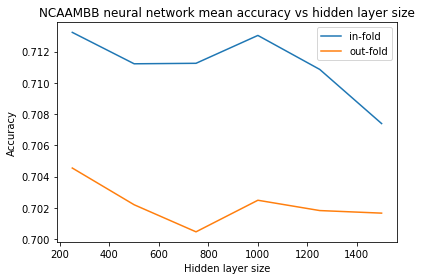

In [122]:
in_fold_hls_summary =  neural_network_results[(neural_network_results['solver'] == solver_opt) &
                                              (neural_network_results['activation'] == activation_opt) &
                                              (neural_network_results['alpha'] == alpha_opt)].groupby(['hidden_layer_size'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['hidden_layer_size'], ascending = True)
out_fold_hls_summary = neural_network_results[(neural_network_results['solver'] == solver_opt) &
                                              (neural_network_results['activation'] == activation_opt) &
                                              (neural_network_results['alpha'] == alpha_opt)].groupby(['hidden_layer_size'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['hidden_layer_size'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("Hidden layer size")
ax.set_ylabel("Accuracy")
ax.set_title("NCAAMBB neural network mean accuracy vs hidden layer size")
ax.plot(hidden_layer_sizes,
        in_fold_hls_summary['mean'],
        label = "in-fold")
ax.plot(hidden_layer_sizes,
        out_fold_hls_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

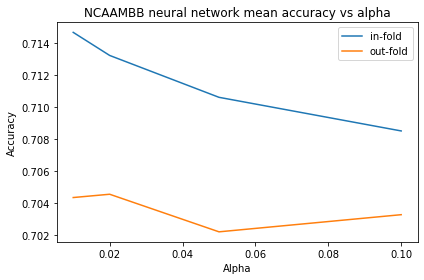

In [123]:
in_fold_alpha_summary = neural_network_results[(neural_network_results['solver'] == solver_opt) &
                                               (neural_network_results['activation'] == activation_opt) &
                                               (neural_network_results['hidden_layer_size'] == hidden_layer_size_opt)].groupby(['alpha'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['alpha'], ascending = True)
out_fold_alpha_summary = neural_network_results[(neural_network_results['solver'] == solver_opt) &
                                                (neural_network_results['activation'] == activation_opt) &
                                                (neural_network_results['hidden_layer_size'] == hidden_layer_size_opt)].groupby(['alpha'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['alpha'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("NCAAMBB neural network mean accuracy vs alpha")
ax.plot(alphas,
        in_fold_alpha_summary['mean'],
        label = "in-fold")
ax.plot(alphas,
        out_fold_alpha_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

In [124]:
neural_network_train_sizes = []
neural_network_train_size_train_scores = []
neural_network_train_size_test_scores = []
neural_network_train_size_train_time = []
neural_network_train_size_score_time = []

iter = 0
train_sizes = np.linspace(.05,.95, 19)
for train_size in train_sizes:
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(ncaa_all_features,
                                                                            ncaa_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(ncaa_all_features,
                                                                            ncaa_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    
    iter = iter + 1
    print("iter:", iter,
          " | train size:", train_size)
    neural_network_train_size = MLPClassifier(solver = solver_opt, #lbfgs, adam, sgd
                                                   activation = activation_opt, #identity, logistic, tanh, relu
                                                   alpha = alpha_opt,
                                                   hidden_layer_sizes = (hidden_layer_size_opt,),
                                                   batch_size = 'auto',
                                                   learning_rate = 'constant',
                                                   learning_rate_init = 0.001,
                                                   power_t = 0.5,
                                                   max_iter = 200,
                                                   shuffle = True,
                                                   random_state = 28,
                                                   tol = 0.0001,
                                                   verbose = False,
                                                   warm_start = False,
                                                   momentum = 0.9,
                                                   nesterovs_momentum = True,
                                                   early_stopping = True,
                                                   validation_fraction = 0.1,
                                                   beta_1 = 0.9,
                                                   beta_2 = 0.999,
                                                   epsilon = 1e-08,
                                                   n_iter_no_change = 10,
                                                   max_fun = 15000)
    
    start = time.time()
    neural_network_train_size.fit(train_features_train_size, train_response_train_size)
    end = time.time()
    neural_network_train_size_train_time.append(end - start)

    neural_network_train_sizes.append(neural_network_train_size)
    
    start = time.time()
    neural_network_train_size_train_scores.append(neural_network_train_size.score(train_features_train_size, train_response_train_size)) 
    end = time.time()
    neural_network_train_size_score_time.append(end - start)

    neural_network_train_size_test_scores.append(neural_network_train_size.score(test_features_train_size, test_response_train_size))

iter: 1  | train size: 0.05
iter: 2  | train size: 0.1
iter: 3  | train size: 0.15
iter: 4  | train size: 0.2
iter: 5  | train size: 0.25
iter: 6  | train size: 0.3
iter: 7  | train size: 0.35
iter: 8  | train size: 0.39999999999999997
iter: 9  | train size: 0.44999999999999996
iter: 10  | train size: 0.49999999999999994
iter: 11  | train size: 0.5499999999999999
iter: 12  | train size: 0.6
iter: 13  | train size: 0.65
iter: 14  | train size: 0.7
iter: 15  | train size: 0.75
iter: 16  | train size: 0.7999999999999999
iter: 17  | train size: 0.85
iter: 18  | train size: 0.9
iter: 19  | train size: 0.95


### Plotting the learning curve by training size, for the optimal hyperparameters

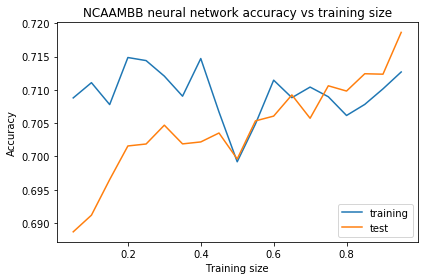

In [128]:
fig, ax = plt.subplots()

ax.set_xlabel("Training size")
ax.set_ylabel("Accuracy")
ax.set_title("NCAAMBB neural network accuracy vs training size")
ax.plot(train_sizes, neural_network_train_size_train_scores, label = "training",
        #drawstyle = "steps-post"
       )
ax.plot(train_sizes, neural_network_train_size_test_scores, label = "test",
        #drawstyle = "steps-post"
       )
ax.legend()

fig.tight_layout()

###  Plotting the model fitting time as a function of the training size

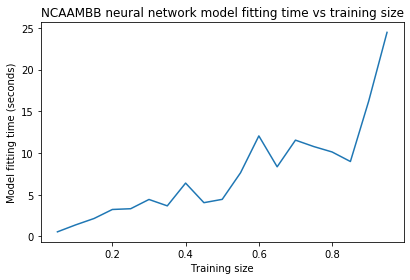

In [129]:
fig, ax = plt.subplots()

ax.set_xlabel("Training size")
ax.set_ylabel("Model fitting time (seconds)")
ax.set_title("NCAAMBB neural network model fitting time vs training size")
ax.plot(train_sizes, neural_network_train_size_train_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()

### Plotting the model scoring time as a function of the training size

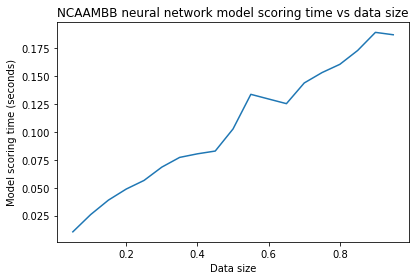

In [130]:
fig, ax = plt.subplots()

ax.set_xlabel("Data size")
ax.set_ylabel("Model scoring time (seconds)")
ax.set_title("NCAAMBB neural network model scoring time vs data size")
ax.plot(train_sizes, neural_network_train_size_score_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()